## ワードクラウドによる投稿ワード可視化（5ちゃんねる）
- スクレイピングにより5ちゃんねるから取得した投稿をワードクラウドで可視化

In [7]:
# 必要なライブラリをインポートする
import pandas as pd
import MeCab
import matplotlib.pyplot as plt
import japanize_matplotlib
from wordcloud import WordCloud, STOPWORDS
import os

In [8]:
# データ読み込み
data_path = '../../data/'
file_path = '20230313_gochannel_current_log_scripts.csv'
df = pd.read_csv(data_path + file_path, encoding = 'utf-8')

In [9]:
# テキストデータの取り出し
target_columns = ['script']
text = df[target_columns].to_string(index = False, header = False)
text

'                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                       

### 形態素解析処理

In [10]:
tagger = MeCab.Tagger()
tagger.parse('')
node = tagger.parseToNode(text)
# 4つの品詞を取り出す
word_list = []
while node:
    word_type = node.feature.split(',')[0]
    if word_type in ['名詞', '形容詞', '副詞', '動詞']:
        word_list.append(node.surface)
    node = node.next
# word_listを文字列に変換する
word_chain = ' '.join(word_list)

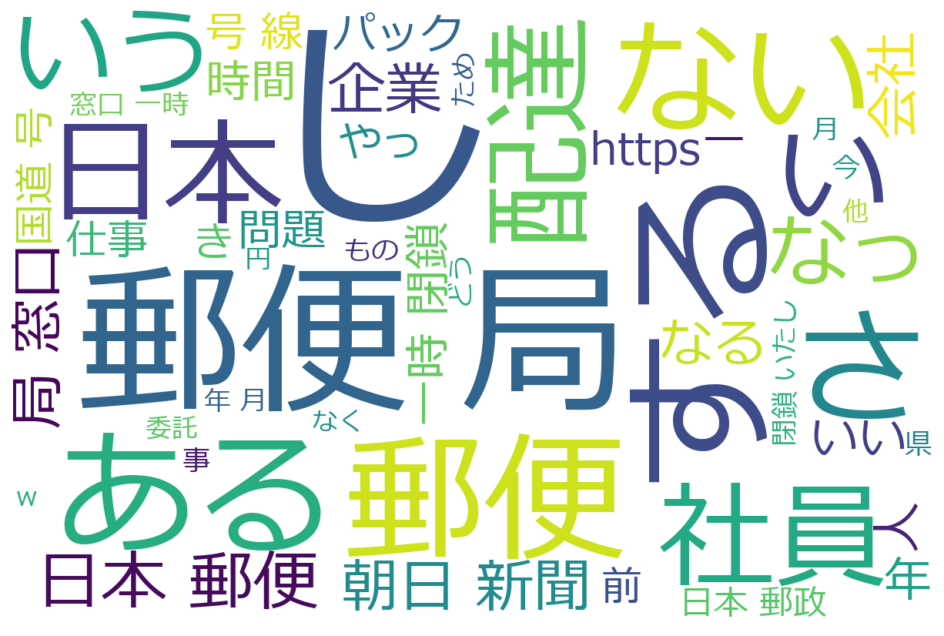

In [12]:
# ワードクラウドを生成
output_path = '../output/'
os.makedirs(output_path, exist_ok = True)
filename = 'gochannel_wordcloud.png' # 処理結果を保存する際のファイル名
font_path = 'C:/Windows/Fonts/meiryo.ttc'  # Meiryoフォントのパスを指定

# ストップワード指定
stopwords_dir = '../../data/'
stopwords_csv = 'stopwords.csv'
stopwords_list = pd.read_csv(stopwords_dir + stopwords_csv)['stopwords'].tolist()
stopwords = set(STOPWORDS)
for word in stopwords_list:
    stopwords.add(word)

# ワードクラウド描画
wordcloud = WordCloud(width = 1200, height = 800,
                      stopwords = stopwords,
                      background_color = 'white',
                      min_font_size = 10,
                      font_path = font_path,
                      max_words = 50).generate(word_chain)
plt.figure(figsize = (12, 8), facecolor = None)
plt.imshow(wordcloud, interpolation = 'bilinear')
plt.axis('off')
plt.savefig(output_path + filename, dpi = 300)
plt.show()